## Data preparation for API

In [2]:
import pandas as pd 
import os
import numpy as np
import seaborn as sns
import json
from datetime import datetime
import matplotlib.pyplot as plt
import math
import csv
from geopy.geocoders import Nominatim
import geocoder

In [2]:
pd.set_option('display.max_columns', None)

In [4]:
accidents_raw = pd.read_csv('/Users/ersankucukoglu/Desktop/Projects/accidents_python-project/data/raw/Accidents0515.csv')

In [5]:
#drop NAs
accidents = accidents_raw.dropna()

In [6]:
accidents['Date'] = pd.to_datetime(accidents['Date'], format='%d/%m/%Y')

/var/folders/zv/s48v24ws6gq1pfmppbzwjvs00000gn/T/ipykernel_3713/554119514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents['Date'] = pd.to_datetime(accidents['Date'], format='%d/%m/%Y')


In [7]:
accidents = accidents.set_index('Date').sort_index()

In [8]:
accidents.head(10)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005-01-01,200506Q917927,390440.0,405500.0,-2.145753,53.546041,6,3,2,5,7,15:30,104,E08000004,3,663,6,40,6,4,3,669,0,0,1,2,2,0,0,1,1,E01005327
2005-01-01,2005030000222,309370.0,525330.0,-3.404932,54.614977,3,3,1,1,7,00:58,60,E10000006,3,5086,6,60,0,-1,-1,0,0,0,6,1,2,0,0,2,1,E01019091
2005-01-01,2005160D00630,508560.0,429470.0,-0.355114,53.750295,16,3,2,2,7,14:02,228,E06000010,6,0,6,30,3,4,6,0,0,0,1,1,1,0,0,1,1,E01012852
2005-01-01,200542E000101,599770.0,227110.0,0.902767,51.906647,42,3,1,1,7,11:05,455,E10000012,6,0,6,30,0,-1,-1,0,0,0,1,1,1,0,0,1,1,E01021679
2005-01-01,200542E000201,603020.0,230820.0,0.952133,51.938785,42,2,1,2,7,23:57,455,E10000012,3,12,3,70,0,-1,-1,0,0,0,6,1,2,0,0,2,1,E01021655
2005-01-01,2005160D01750,507360.0,428710.0,-0.373569,53.743715,16,3,2,1,7,19:16,228,E06000010,3,1105,6,30,6,2,6,0,0,5,4,1,2,0,0,1,1,E01012859
2005-01-01,2005160D03840,513430.0,431660.0,-0.280490,53.768934,16,3,2,1,7,17:40,228,E06000010,3,165,3,30,3,4,6,0,0,0,4,4,2,0,0,1,1,E01012825
2005-01-01,200563AC00405,229590.0,210290.0,-4.470960,51.765247,63,3,1,1,7,06:20,751,W06000010,3,4066,6,30,0,-1,-1,0,0,0,4,1,2,0,0,2,1,W01000673
2005-01-01,2005160D04130,515090.0,430310.0,-0.255820,53.756442,16,3,3,2,7,19:19,228,E06000010,6,0,6,30,8,4,6,0,0,0,4,2,2,0,0,1,1,E01012846


In [9]:
#it takes hours to load data, thus we loaded it by weeks/months
accidents_dec1 = accidents.loc['2015-12-01':'2015-12-07']

In [10]:
accidents_dec1.shape

(2700, 31)

In [11]:
#add city using geocoder package

def city_name(x):
    g = geocoder.osm([x.Latitude, x.Longitude], method='reverse').json
    if g:
        return g.get('city')
    else:
        return 'no city'

In [16]:
accidents_dec1['city'] = accidents_dec1[['Latitude', 'Longitude']].apply(city_name, axis=1)

/var/folders/lc/3yknv_8x5832sztwzg33_tcw0000gn/T/ipykernel_38605/2244529344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents_dec1['city'] = accidents_dec1[['Latitude', 'Longitude']].apply(city_name, axis=1)


In [17]:
accidents_dec1.to_csv('01122015-07122015.csv') #do the same for other dates

In [3]:
september = pd.read_csv('/Users/sabina/Documents/2022/project/data/cities/01092015-30092015.csv',on_bad_lines='skip')
october = pd.read_csv('/Users/sabina/Documents/2022/project/data/cities/01102015-31102015.csv',on_bad_lines='skip')
november = pd.read_csv('/Users/sabina/Documents/2022/project/data/cities/01112015-30112015.csv',on_bad_lines='skip')

In [6]:
december = pd.read_csv('/Users/sabina/Documents/2022/project/data/cities/01122015-31122015.csv',on_bad_lines='skip')
january = pd.read_csv('/Users/sabina/Documents/2022/project/data/cities/01012015-31012015.csv',on_bad_lines='skip')
february = pd.read_csv('/Users/sabina/Documents/2022/project/data/cities/01022015-28022015.csv',on_bad_lines='skip')

In [7]:
march = pd.read_csv('/Users/sabina/Documents/2022/project/data/cities/01032015-31032015.csv',on_bad_lines='skip')
april = pd.read_csv('/Users/sabina/Documents/2022/project/data/cities/01042015-30042015.csv',on_bad_lines='skip')
may = pd.read_csv('/Users/sabina/Documents/2022/project/data/cities/01052015-31052015.csv',on_bad_lines='skip')

In [9]:
june = pd.read_csv('/Users/sabina/Documents/2022/project/data/cities/01062015-30062015.csv',on_bad_lines='skip')
july = pd.read_csv('/Users/sabina/Documents/2022/project/data/cities/01072015-31072015.csv',on_bad_lines='skip')
august = pd.read_csv('/Users/sabina/Documents/2022/project/data/cities/01082015-31082015.csv',on_bad_lines='skip')

In [15]:
accidents_withcities=pd.concat([january,february,march,april,may,june,july,august,september,october,november,december])

In [16]:
accidents_withcities.head(10)

,Date,Accident_Index_x,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,city,Accident_Index
0,2015-01-01,2015450021404,520918.0,165420.0,-0.264115,51.374969,45,3,1,1,...,7,1,2,0,0,1,1,E01030388,Epsom and Ewell,NaN
1,2015-01-01,2015450021402,521727.0,153984.0,-0.256400,51.272014,45,3,1,1,...,1,2,2,0,0,2,1,E01030639,Reigate and Banstead,NaN
2,2015-01-01,2015460251429,558490.0,173060.0,0.278702,51.434375,46,3,1,1,...,4,8,2,0,0,2,1,E01024141,Dartford,NaN
3,2015-01-01,2015460251435,612500.0,156530.0,1.044814,51.268290,46,3,4,5,...,4,1,2,0,0,1,1,E01024127,Canterbury,NaN
4,2015-01-01,2015460251450,635800.0,166190.0,1.384607,51.345845,46,2,2,1,...,1,1,1,0,0,1,1,E01024682,Thanet,NaN
5,2015-01-01,2015100003115,420292.0,565382.0,-1.684459,54.982629,10,3,2,1,...,1,1,1,0,0,1,1,E01008344,Newcastle upon Tyne,NaN
6,2015-01-01,2015460251483,637240.0,170020.0,1.407799,51.379623,46,3,2,4,...,4,1,2,0,0,1,1,E01024666,Thanet,NaN
7,2015-01-01,2015450020982,499202.0,149790.0,-0.580344,51.238676,45,3,2,1,...,4,5,2,0,0,1,1,E01030452,NaN,NaN
8,2015-01-01,2015100000615,424679.0,566841.0,-1.615787,54.995543,10,3,2,1,...,4,4,2,0,0,1,1,E01008369,Newcastle upon Tyne,NaN
9,2015-01-01,2015100000115,429961.0,581447.0,-1.531700,55.126501,10,3,1,1,...,4,2,2,0,0,1,1,E01027392,NaN,NaN


In [17]:
accidents_withcities.shape

(133154, 34)

In [18]:
accidents_withcities['city'].mode()

0    London
dtype: object

In [19]:
#filter for the most frequent city
accidents_London_2015 = accidents_withcities[accidents_withcities['city']=="London"]

In [20]:
accidents_London_2015.shape

(23651, 34)

In [21]:
accidents_London_2015.head(10)

,Date,Accident_Index_x,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,city,Accident_Index
17,2015-01-01,201501JC30088,538410.0,186780.0,-0.004597,51.562921,1,3,2,4,...,4,1,1,0,0,1,1,E01004373,London,NaN
28,2015-01-01,201501GD10020,533950.0,183510.0,-0.070144,51.534611,1,3,2,1,...,4,1,1,0,0,1,2,E01001774,London,NaN
35,2015-01-01,201501GD10022,532050.0,187470.0,-0.096036,51.570645,1,3,2,1,...,4,2,2,0,0,1,1,E01001714,London,NaN
37,2015-01-01,201501ZD30148,534550.0,164390.0,-0.068762,51.362649,1,3,1,1,...,4,2,2,0,0,1,1,E01001122,London,NaN
48,2015-01-01,201501MM70020,532510.0,176890.0,-0.093378,51.475460,1,3,1,1,...,4,1,1,0,0,1,1,E01003921,London,NaN
49,2015-01-01,201501QK50060,518960.0,184060.0,-0.285969,51.542909,1,3,4,2,...,4,1,1,0,0,1,1,E01000477,London,NaN
51,2015-01-01,201501HT20022,534580.0,181310.0,-0.061906,51.514692,1,3,2,1,...,4,1,1,0,0,1,1,E01004319,London,NaN
54,2015-01-01,201501HT20025,534940.0,181990.0,-0.056461,51.520717,1,3,1,1,...,4,1,2,0,0,1,1,E01004208,London,NaN
57,2015-01-01,201501HT20122,534810.0,181850.0,-0.058387,51.519490,1,3,1,1,...,4,1,2,0,0,1,1,E01004208,London,NaN
66,2015-01-01,201501EK40147,530770.0,181590.0,-0.116677,51.518102,1,3,1,1,...,4,1,1,0,0,1,2,E01000914,London,NaN


## Weather API

In [22]:
import urllib.parse
import urllib.request
import json
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [23]:
#get the winter season weather data for london 

API_KEY="JHJKNRM6CC52KJTBZ66V29A86"
LOCATION="London,UK"
UNIT_GROUP="us"
#start_date = '2015-01-01'
#end_date = '2015-02-29'
start_date = '2015-01-01'
end_date = '2015-12-31'

def getWeatherForecast():
    requestUrl = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/" + urllib.parse.quote_plus(LOCATION)
    requestUrl = requestUrl+'/'+str(start_date)+'/'+str(end_date)+"?key="+API_KEY+"&unitGroup="+UNIT_GROUP+"&include=days";
    print('Weather requestUrl={requestUrl}'.format(requestUrl=requestUrl))
    

    try:
        req = urllib.request.urlopen(requestUrl)
    except:
                 print("Could not read from:"+requestUrl);
                 return []
                
    rawForecastData = req.read()
    req.close()
    return json.loads(rawForecastData)
    
    
weatherForecast = getWeatherForecast()

print('Weather forecast for {location}'.format(location=weatherForecast['resolvedAddress']))
days=weatherForecast['days'];

for day in days:
    print('{datetime} tempmax:{tempmax} tempmin:{tempmin} description:{description}'.format(datetime=day['datetime'], tempmax=day["tempmax"], tempmin=day["tempmin"], description=day["description"]))



Weather requestUrl=https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/London%2CUK/2015-01-01/2015-12-31?key=JHJKNRM6CC52KJTBZ66V29A86&unitGroup=us&include=days
Weather forecast for London, England, United Kingdom
2015-01-01 tempmax:53.3 tempmin:41.3 description:Clear conditions throughout the day with morning rain.
2015-01-02 tempmax:54.8 tempmin:41.1 description:Clear conditions throughout the day with early morning rain.
2015-01-03 tempmax:43.9 tempmin:36.6 description:Clear conditions throughout the day with rain in the morning and afternoon.
2015-01-04 tempmax:38.6 tempmin:32.3 description:Clear conditions throughout the day with afternoon rain.
2015-01-05 tempmax:49.7 tempmin:40.2 description:Clear conditions throughout the day.
2015-01-06 tempmax:51.0 tempmin:37.5 description:Clear conditions throughout the day with late afternoon rain.
2015-01-07 tempmax:50.3 tempmin:35.0 description:Clear conditions throughout the day with afternoon rain.
2015-0

In [24]:
#1#london_weather_jan_feb = pd.DataFrame(days)
london_weather = pd.DataFrame(days)

In [25]:
#1#london_weather_jan_feb.head()
london_weather.head()

,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,sunriseEpoch,sunset,sunsetEpoch,moonphase,conditions,description,icon,stations,source,tzoffset
0,2015-01-01,1420070400,53.3,41.3,47.7,53.3,41.3,47.7,43.5,85.34,...,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN
1,2015-01-02,1420156800,54.8,41.1,48.1,54.8,41.1,48.1,38.5,69.99,...,1420185969,16:02:53,1420214573,0.46,Rain,Clear conditions throughout the day with early...,rain,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN
2,2015-01-03,1420243200,43.9,36.6,41.1,43.9,36.6,41.1,37.4,86.73,...,1420272359,16:03:59,1420301039,0.49,Rain,Clear conditions throughout the day with rain ...,rain,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN
3,2015-01-04,1420329600,38.6,32.3,35.8,38.6,32.3,35.8,34.0,93.34,...,1420358746,16:05:09,1420387509,0.50,Rain,Clear conditions throughout the day with after...,rain,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN
4,2015-01-05,1420416000,49.7,40.2,45.8,49.7,40.2,45.8,40.4,81.42,...,1420445129,16:06:20,1420473980,0.50,Clear,Clear conditions throughout the day.,clear-day,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN


In [26]:
#london_weather.to_csv('/Users/ersankucukoglu/Desktop/Projects/accidents_python-project/data/clean/london_weather_data.csv')
london_weather.to_csv('/Users/sabina/Documents/2022/project/data/clean/london_weather.csv')


## Merge london_weather_data AND accidents_London_winter2015

In [27]:
accidents_London_2015.head()

,Date,Accident_Index_x,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,city,Accident_Index
17,2015-01-01,201501JC30088,538410.0,186780.0,-0.004597,51.562921,1,3,2,4,...,4,1,1,0,0,1,1,E01004373,London,NaN
28,2015-01-01,201501GD10020,533950.0,183510.0,-0.070144,51.534611,1,3,2,1,...,4,1,1,0,0,1,2,E01001774,London,NaN
35,2015-01-01,201501GD10022,532050.0,187470.0,-0.096036,51.570645,1,3,2,1,...,4,2,2,0,0,1,1,E01001714,London,NaN
37,2015-01-01,201501ZD30148,534550.0,164390.0,-0.068762,51.362649,1,3,1,1,...,4,2,2,0,0,1,1,E01001122,London,NaN
48,2015-01-01,201501MM70020,532510.0,176890.0,-0.093378,51.475460,1,3,1,1,...,4,1,1,0,0,1,1,E01003921,London,NaN


In [28]:
accidents_London_2015.rename(columns = {'Date':'date'}, inplace = True)


/Users/sabina/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [29]:
london_weather.head()

,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,sunriseEpoch,sunset,sunsetEpoch,moonphase,conditions,description,icon,stations,source,tzoffset
0,2015-01-01,1420070400,53.3,41.3,47.7,53.3,41.3,47.7,43.5,85.34,...,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN
1,2015-01-02,1420156800,54.8,41.1,48.1,54.8,41.1,48.1,38.5,69.99,...,1420185969,16:02:53,1420214573,0.46,Rain,Clear conditions throughout the day with early...,rain,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN
2,2015-01-03,1420243200,43.9,36.6,41.1,43.9,36.6,41.1,37.4,86.73,...,1420272359,16:03:59,1420301039,0.49,Rain,Clear conditions throughout the day with rain ...,rain,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN
3,2015-01-04,1420329600,38.6,32.3,35.8,38.6,32.3,35.8,34.0,93.34,...,1420358746,16:05:09,1420387509,0.50,Rain,Clear conditions throughout the day with after...,rain,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN
4,2015-01-05,1420416000,49.7,40.2,45.8,49.7,40.2,45.8,40.4,81.42,...,1420445129,16:06:20,1420473980,0.50,Clear,Clear conditions throughout the day.,clear-day,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN


In [30]:
london_weather.rename(columns = {'datetime':'date'}, inplace = True)

In [31]:
df = accidents_London_2015.merge(london_weather, on='date', how='left')

In [32]:
df.head()

,date,Accident_Index_x,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,sunriseEpoch,sunset,sunsetEpoch,moonphase,conditions,description,icon,stations,source,tzoffset
0,2015-01-01,201501JC30088,538410.0,186780.0,-0.004597,51.562921,1,3,2,4,...,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN
1,2015-01-01,201501GD10020,533950.0,183510.0,-0.070144,51.534611,1,3,2,1,...,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN
2,2015-01-01,201501GD10022,532050.0,187470.0,-0.096036,51.570645,1,3,2,1,...,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN
3,2015-01-01,201501ZD30148,534550.0,164390.0,-0.068762,51.362649,1,3,1,1,...,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN
4,2015-01-01,201501MM70020,532510.0,176890.0,-0.093378,51.475460,1,3,1,1,...,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN


In [33]:
#df.to_csv('/Users/ersankucukoglu/Desktop/Projects/accidents_python-project/data/clean/accidents_london.csv')
df.to_csv('/Users/sabina/Documents/2022/project/data/clean/accidents_london.csv')

In [34]:
#load london accidents data
accidents_london = pd.read_csv('/Users/sabina/Documents/2022/project/data/clean/accidents_london.csv')

/Users/sabina/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [35]:
accidents_london.head(10)

,Unnamed: 0,date,Accident_Index_x,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,...,sunriseEpoch,sunset,sunsetEpoch,moonphase,conditions,description,icon,stations,source,tzoffset
0,0,2015-01-01,201501JC30088,538410.0,186780.0,-0.004597,51.562921,1,3,2,...,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"['03769099999', '03680099999', '03672099999', ...",obs,NaN
1,1,2015-01-01,201501GD10020,533950.0,183510.0,-0.070144,51.534611,1,3,2,...,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"['03769099999', '03680099999', '03672099999', ...",obs,NaN
2,2,2015-01-01,201501GD10022,532050.0,187470.0,-0.096036,51.570645,1,3,2,...,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"['03769099999', '03680099999', '03672099999', ...",obs,NaN
3,3,2015-01-01,201501ZD30148,534550.0,164390.0,-0.068762,51.362649,1,3,1,...,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"['03769099999', '03680099999', '03672099999', ...",obs,NaN
4,4,2015-01-01,201501MM70020,532510.0,176890.0,-0.093378,51.475460,1,3,1,...,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"['03769099999', '03680099999', '03672099999', ...",obs,NaN
5,5,2015-01-01,201501QK50060,518960.0,184060.0,-0.285969,51.542909,1,3,4,...,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"['03769099999', '03680099999', '03672099999', ...",obs,NaN
6,6,2015-01-01,201501HT20022,534580.0,181310.0,-0.061906,51.514692,1,3,2,...,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"['03769099999', '03680099999', '03672099999', ...",obs,NaN
7,7,2015-01-01,201501HT20025,534940.0,181990.0,-0.056461,51.520717,1,3,1,...,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"['03769099999', '03680099999', '03672099999', ...",obs,NaN
8,8,2015-01-01,201501HT20122,534810.0,181850.0,-0.058387,51.519490,1,3,1,...,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"['03769099999', '03680099999', '03672099999', ...",obs,NaN
9,9,2015-01-01,201501EK40147,530770.0,181590.0,-0.116677,51.518102,1,3,1,...,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"['03769099999', '03680099999', '03672099999', ...",obs,NaN


## Analytical questions

### Q1: How number of accidents is affected by weather conditions?

In [7]:
#We need to create a dataframe by date

In [36]:
#check names of columns to leave only needed ones for answering question
for col in accidents_london.columns:
    print(col)
    
#columns selected: date, tempmax, tempmin, temp, feelslikemax, feelslikemin, feelslike, dew, humidity, snow,
#snowdepth, windgustl, windspeed, cloudcover, visibility, sunrise, sunset

Unnamed: 0
date
Accident_Index_x
Location_Easting_OSGR
Location_Northing_OSGR
Longitude
Latitude
Police_Force
Accident_Severity
Number_of_Vehicles
Number_of_Casualties
Day_of_Week
Time
Local_Authority_(District)
Local_Authority_(Highway)
1st_Road_Class
1st_Road_Number
Road_Type
Speed_limit
Junction_Detail
Junction_Control
2nd_Road_Class
2nd_Road_Number
Pedestrian_Crossing-Human_Control
Pedestrian_Crossing-Physical_Facilities
Light_Conditions
Weather_Conditions
Road_Surface_Conditions
Special_Conditions_at_Site
Carriageway_Hazards
Urban_or_Rural_Area
Did_Police_Officer_Attend_Scene_of_Accident
LSOA_of_Accident_Location
city
Accident_Index
datetimeEpoch
tempmax
tempmin
temp
feelslikemax
feelslikemin
feelslike
dew
humidity
precip
precipprob
precipcover
preciptype
snow
snowdepth
windgust
windspeed
winddir
pressure
cloudcover
visibility
solarradiation
solarenergy
uvindex
sunrise
sunriseEpoch
sunset
sunsetEpoch
moonphase
conditions
description
icon
stations
source
tzoffset


In [37]:
#check number of accidents by date
accidents_london.groupby('date').size().sort_values(ascending=False)

date
2015-03-04    166
2015-03-10    154
2015-03-06    150
2015-09-21    112
2015-03-05    110
             ... 
2015-04-04     35
2015-04-05     32
2015-03-22     31
2015-01-01     25
2015-03-31     24
Length: 364, dtype: int64

In [38]:
#create new df with a column of number of accidents 
dategrouped = accidents_london.groupby('date').mean().round(2)
dategrouped['number_of_accidents'] = round(accidents_london.groupby(['date']).size())
#select columns
dategrouped = dategrouped[['number_of_accidents', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 
'windspeed', 'cloudcover', 'visibility']]
dategrouped

,number_of_accidents,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,cloudcover,visibility
date,,,,,,,,,,,,
2015-01-01,25,53.3,41.3,47.7,53.3,41.3,47.7,43.5,85.34,0.1,0.6,6.0
2015-01-02,42,54.8,41.1,48.1,54.8,41.1,48.1,38.5,69.99,0.1,0.3,17.4
2015-01-03,38,43.9,36.6,41.1,43.9,36.6,41.1,37.4,86.73,0.1,0.6,7.7
2015-01-04,35,38.6,32.3,35.8,38.6,32.3,35.8,34.0,93.34,0.0,0.4,1.7
2015-01-05,37,49.7,40.2,45.8,49.7,40.2,45.8,40.4,81.42,0.1,0.6,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27,38,58.4,54.8,57.3,58.4,54.8,57.3,52.2,83.10,0.1,0.6,6.4
2015-12-28,39,59.1,49.7,53.1,59.1,49.7,53.1,44.7,73.86,0.1,0.2,13.5
2015-12-29,41,54.8,49.4,52.0,54.8,49.4,52.1,45.8,79.49,12.5,0.4,15.6


In [39]:
dategrouped.shape

(364, 12)

In [40]:
dategrouped.describe()

,number_of_accidents,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,cloudcover,visibility
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,64.975275,60.167033,48.001923,54.013736,60.163187,47.832692,54.009615,44.656593,72.362912,2.301099,0.764286,15.493407
std,16.837317,9.699252,7.961354,8.343135,9.690521,8.092952,8.345586,7.627201,9.683367,4.679331,1.101159,5.544258
min,24.000000,37.500000,27.200000,33.600000,37.500000,26.700000,33.600000,23.600000,48.550000,0.000000,0.000000,1.100000
25%,54.000000,53.300000,42.200000,48.200000,53.300000,41.600000,48.175000,39.300000,65.540000,0.100000,0.300000,11.600000
50%,65.000000,59.600000,48.650000,54.700000,59.600000,48.350000,54.650000,45.400000,72.430000,0.100000,0.400000,15.950000
75%,74.000000,66.800000,53.725000,59.200000,66.800000,53.725000,59.200000,50.400000,79.705000,0.200000,0.600000,19.400000
max,166.000000,93.800000,69.200000,81.500000,94.300000,69.200000,81.600000,61.200000,94.310000,23.800000,6.700000,27.300000


<Figure size 432x288 with 0 Axes>

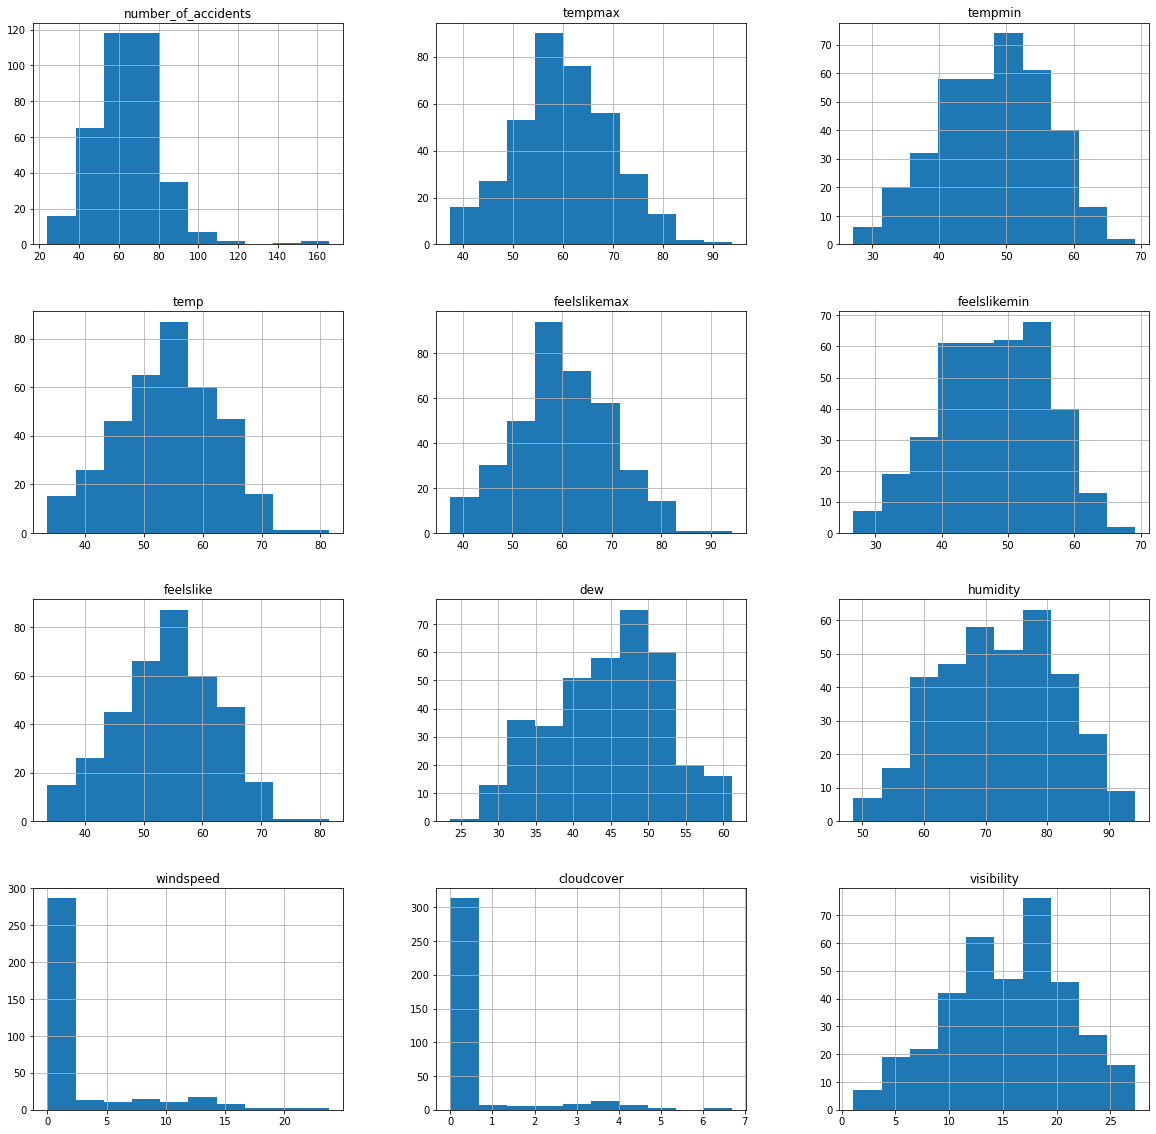

In [41]:
#Histograms
plt.figure()
dategrouped.hist(figsize=(20,20));

<AxesSubplot:>

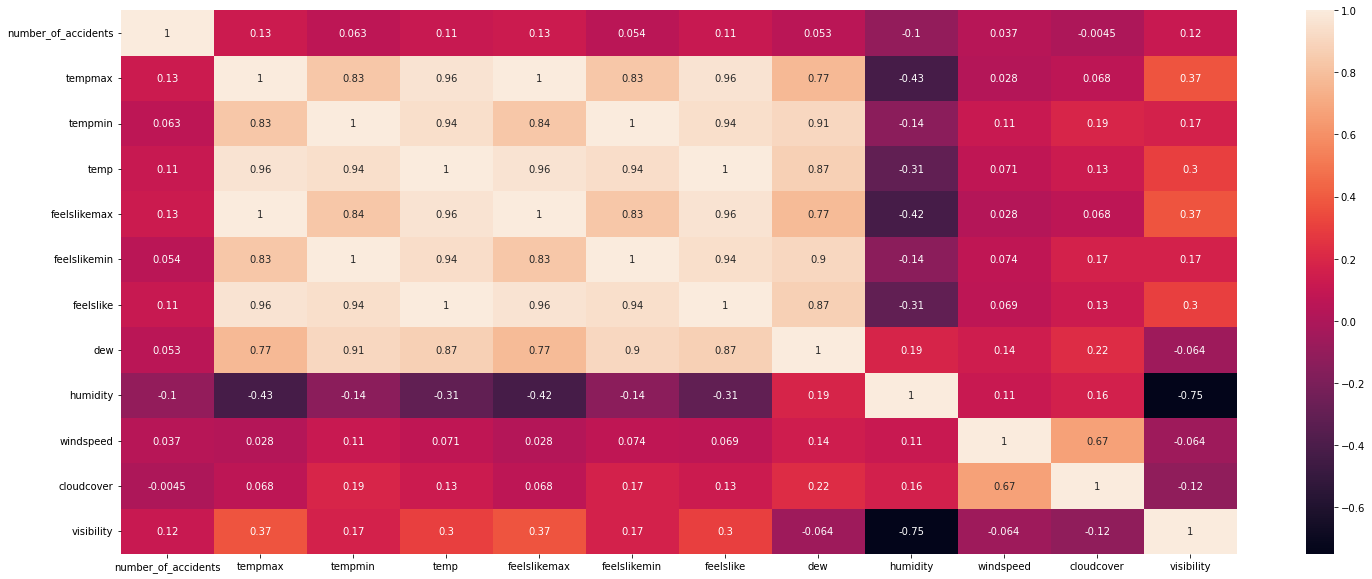

In [42]:
#correlation table
dategrouped_corr = dategrouped.corr()
plt.figure(figsize=(25,10))
sns.heatmap(dategrouped_corr, annot=True)

#weak correlation

tempmax


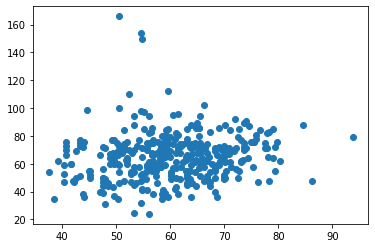

tempmin


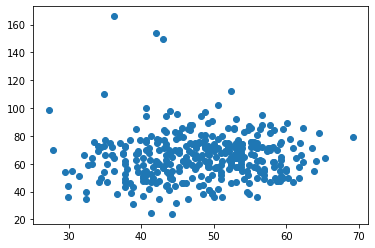

temp


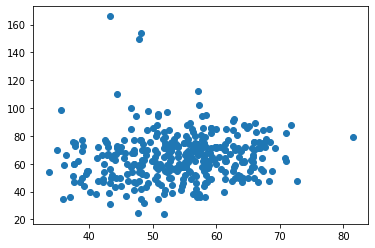

feelslikemax


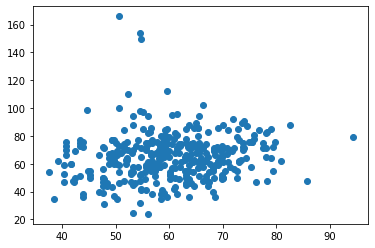

feelslikemin


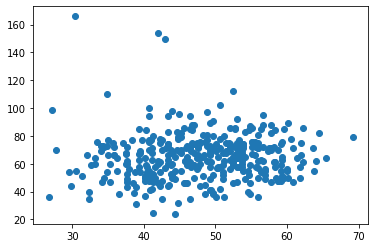

feelslike


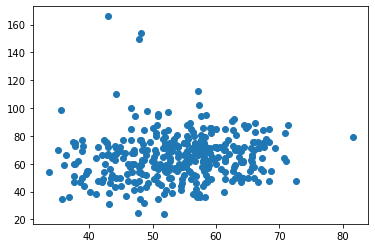

dew


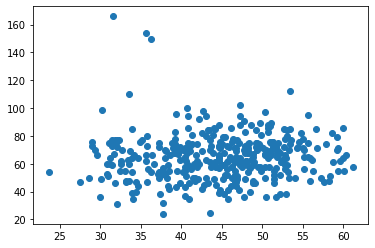

humidity


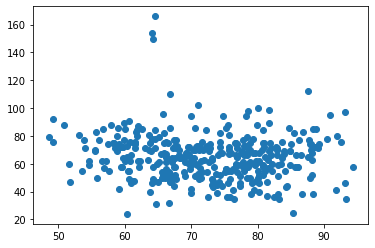

windspeed


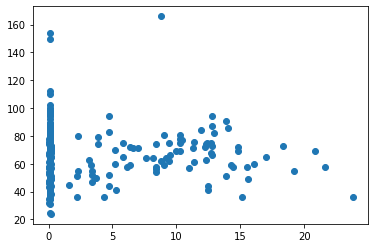

cloudcover


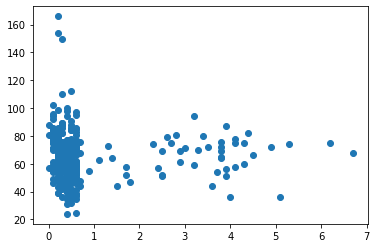

visibility


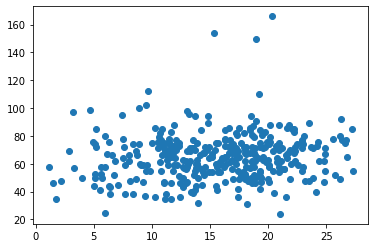

In [43]:
#scatterplots: number of accidents vs weather conditions
for i in ['tempmax','tempmin','temp','feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 
'windspeed', 'cloudcover', 'visibility']:
    print(i)
    plt.scatter(dategrouped[i],dategrouped['number_of_accidents'])
    plt.show()